### What's in the TH2 and MND files

Plotting the tables of values found in the TH2 files, thought to 
be the stock models after each layer.  

Not very interesting so far, but could mean something later

See lower down for the MND file loading and plotting

In [60]:
import pandas

th2file1 = 'output/cadfil1/Vesselv2.TH2'
th2file2 = 'output/cadfil1/Vesselv2layer2.TH2'
th2df1 = pandas.read_csv(th2file1, sep="\s+", skipfooter=5, engine='python')
th2df2 = pandas.read_csv(th2file2, sep="\s+", skipfooter=5, engine='python')
th2df1.head()

,X,R,Angle,t/t0,Slope
0,-450.00,0.00000,0.0,0.0,87.42745
1,-449.75,5.56426,0.0,0.0,87.42745
2,-449.50,11.12852,0.0,0.0,87.42745
3,-449.25,14.88714,0.0,0.0,82.25966
4,-449.00,16.72642,0.0,0.0,82.25966


In [74]:
print("".join(open(th2file1).readlines()[-5:]))
print("".join(open(th2file2).readlines()[-5:]))

 Minimum Thickness= 8.929139813985969E-002
 Maximum Thickness= 0.497079160254751
 Max/Min Ratio= 5.56693220858925
 T0 (Ply Thickness)= 0.100000001490116
 MATL_NO=1

 Minimum Thickness= 0.200744640861499
 Maximum Thickness= 1.97681389339810
 Max/Min Ratio= 9.84740556417629
 T0 (Ply Thickness)= 0.100000001490116
 MATL_NO=1



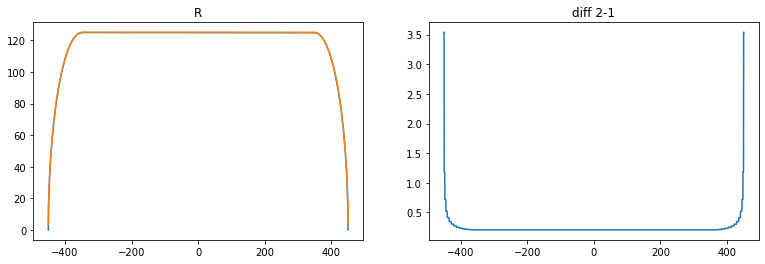

In [79]:
from matplotlib import pyplot as plt
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(th2df1.X, th2df1.R)
plt.plot(th2df2.X, th2df2.R)
plt.title("R")
plt.subplot(122)
plt.plot(th2df1.X, th2df2.R - th2df1.R)
plt.title("diff 2-1");


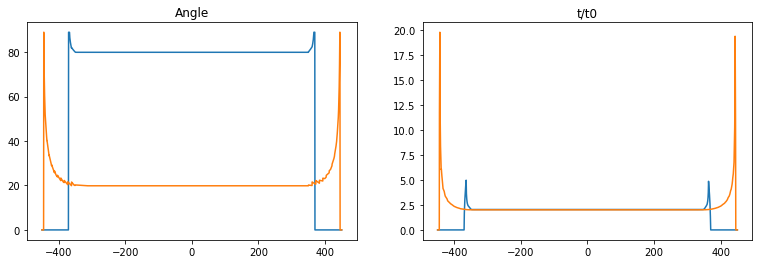

In [66]:
from matplotlib import pyplot as plt
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(th2df1.X, th2df1.Angle)
plt.plot(th2df2.X, th2df2.Angle)
plt.title("Angle")
plt.subplot(122)
plt.plot(th2df1.X, th2df1['t/t0'])
plt.plot(th2df2.X, th2df2['t/t0'])
plt.title("t/t0");

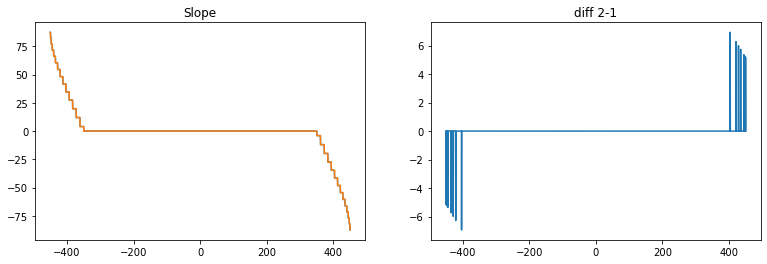

In [67]:
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(th2df1.X, th2df1.Slope)
plt.plot(th2df2.X, th2df2.Slope)
plt.title("Slope")
plt.subplot(122)
plt.plot(th2df1.X, th2df2.Slope - th2df1.Slope)
plt.title("diff 2-1");


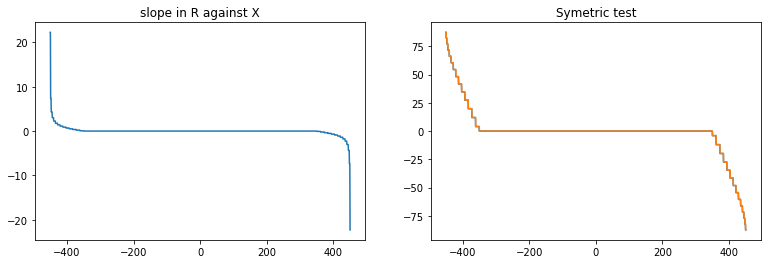

In [78]:
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(th2df1.X, ((th2df1.R - th2df1.R.shift(1))/th2df1.X.diff()))
plt.title("slope in R against X");
plt.subplot(122)
plt.plot(-th2df1.X, -th2df1.Slope)
plt.plot(th2df1.X, th2df1.Slope)
plt.title("Symetric test");


### MND (mandrel files) loading and plotting

The X values are unaligned, so need to be interpolated back to the same 
index spacing before they can be compared in size

    31          (NO. OF MANDREL DATA POINTS)

    31          (NO. OF MANDREL DATA POINTS)

    31          (NO. OF MANDREL DATA POINTS)

    31          (NO. OF MANDREL DATA POINTS)

     6          (NO. OF ENVELOPE DATA POINTS)

     6          (NO. OF ENVELOPE DATA POINTS)

     6          (NO. OF ENVELOPE DATA POINTS)

     6          (NO. OF ENVELOPE DATA POINTS)



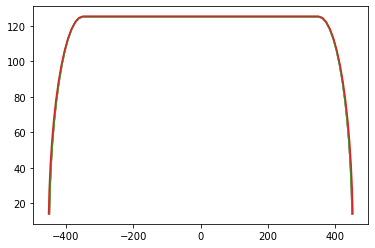

In [80]:
import pandas, io

mnds = [ 'output/cadfil1/Vesselv2.mnd', 'output/cadfil1/Vesselv2layer2.mnd', 
         'output/cadfil1/Vesselv2upd1layerupd.mnd', 'output/cadfil1/Vesselv2layer2upd.mnd' ]
for fname in mnds:
    print(open(fname).readlines()[2])
for fname in mnds:
    print(open(fname).readlines()[34])

def mndtable(fname):
    x = open(fname).readlines()[4:33]
    tab = pandas.read_csv(io.StringIO("".join(x)), sep="\s+", names=["col1", "col2", "col3", "col4"])
    return pandas.Series(tab.col2.values, index=tab.col1.values)
    
tmnds = [ mndtable(fname)  for fname in mnds ]

for tmnd in tmnds:
    plt.plot(tmnd)

In [82]:
def reindex_and_interpolate(df, new_index):
    return df.reindex(df.index.union(new_index)).interpolate(method='index', limit_direction='both').loc[new_index]

tindex = tmnds[0].index
tmnds[1] = reindex_and_interpolate(tmnds[1], tindex)
tmnds[2] = reindex_and_interpolate(tmnds[2], tindex)
tmnds[3] = reindex_and_interpolate(tmnds[3], tindex)


In [88]:
os.path.split("sdfsdf/sdfsdf/sdfs")

('sdfsdf/sdfsdf', 'sdfs')

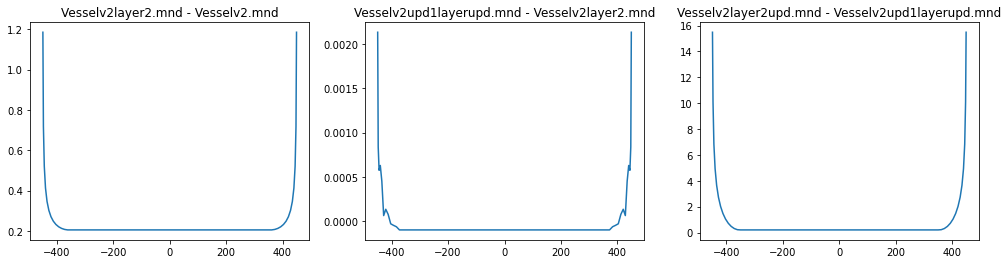

In [91]:
plt.figure(figsize=(17,4))
plt.subplot(131)
plt.plot(tmnds[1] - tmnds[0])
plt.title("%s - %s" % (os.path.split(mnds[1])[1], os.path.split(mnds[0])[1]))
plt.subplot(132)
plt.plot(tmnds[2] - tmnds[1])
plt.title("%s - %s" % (os.path.split(mnds[2])[1], os.path.split(mnds[1])[1]))
plt.subplot(133)
plt.plot(tmnds[3] - tmnds[2])
plt.title("%s - %s" % (os.path.split(mnds[3])[1], os.path.split(mnds[2])[1]));


-450.00     0.00000
-449.75     5.56426
-449.50    11.12852
-449.25    14.88714
-449.00    16.72642
             ...   
 449.00    16.72642
 449.25    14.88714
 449.50    11.12852
 449.75     5.56426
 450.00     0.00000
Length: 3601, dtype: float64

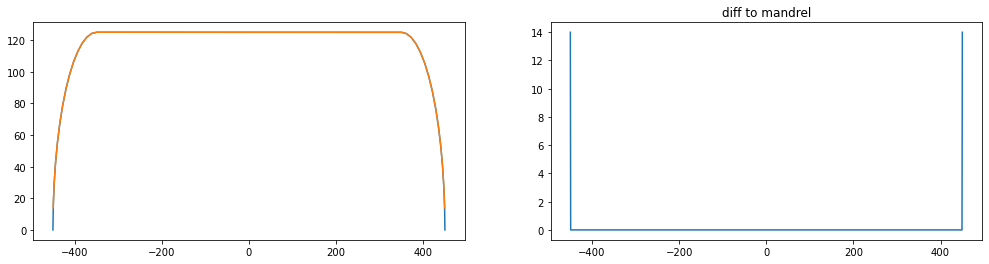

In [102]:
plt.figure(figsize=(17,4))
th2df1S = pandas.Series(th2df1.R.values, th2df1.X.values)

plt.subplot(121)
plt.plot(th2df1S)
plt.plot(tmnds[0])
tmnds0 = reindex_and_interpolate(tmnds[0], th2df1S.index)

plt.subplot(122)
plt.title("diff to mandrel")
plt.plot(tmnds0-th2df1S)
